In [23]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df.drop(columns='id')

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


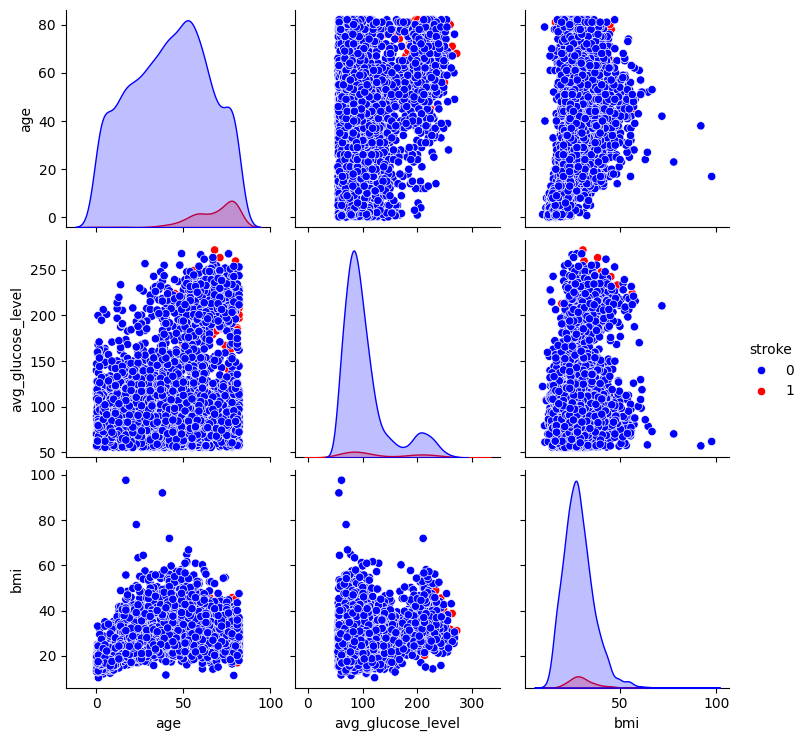

In [27]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

sns.pairplot(df, hue='stroke', vars=numerical_cols, palette={0: 'blue', 1: 'red'})
plt.show()

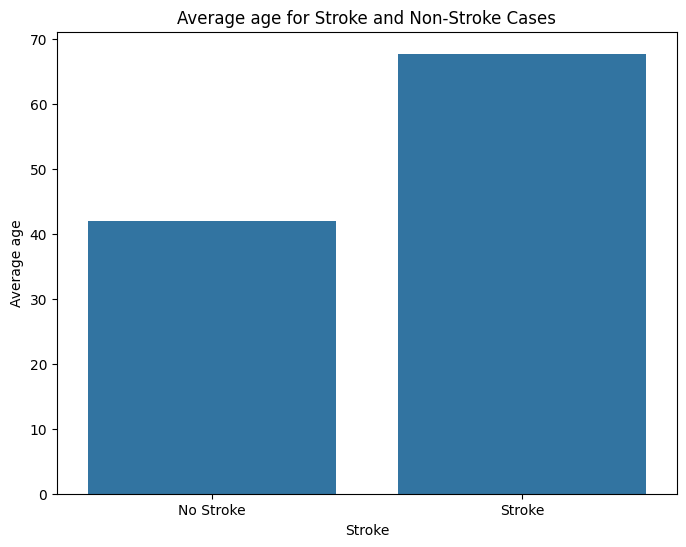

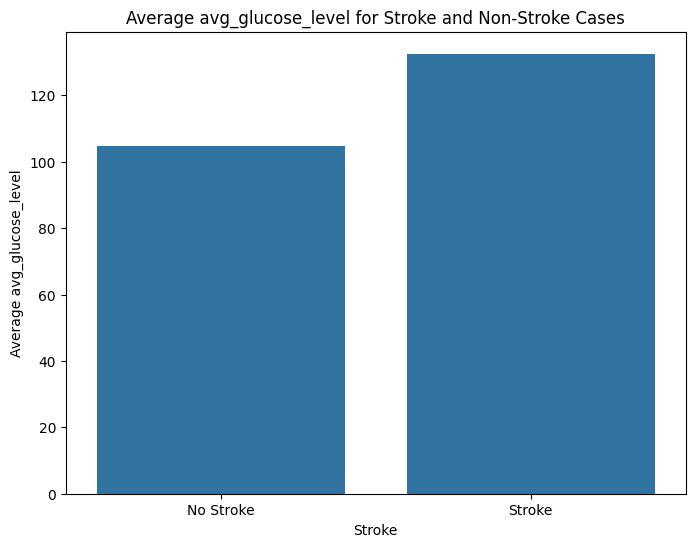

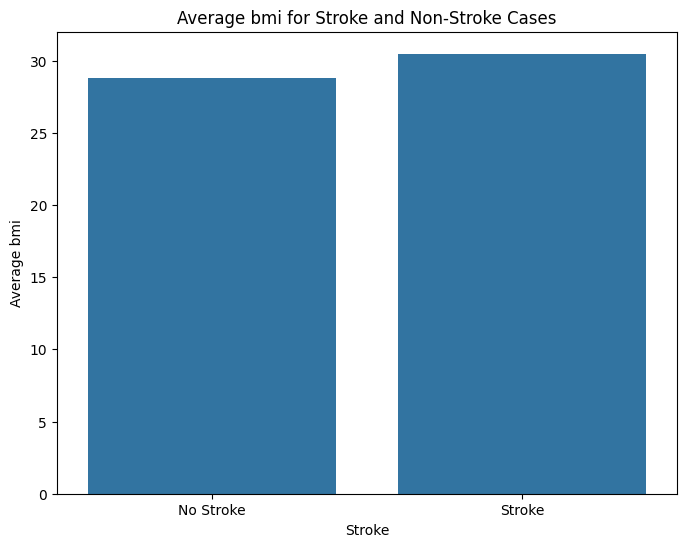

In [28]:
ratio_data = df.groupby('stroke')[numerical_cols].mean().reset_index()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=ratio_data, x='stroke', y=col)
    plt.title(f'Average {col} for Stroke and Non-Stroke Cases')
    plt.xlabel('Stroke')
    plt.ylabel(f'Average {col}')
    plt.xticks([0, 1], ['No Stroke', 'Stroke'])
    plt.show()

In [29]:
df= df.drop(columns='bmi')

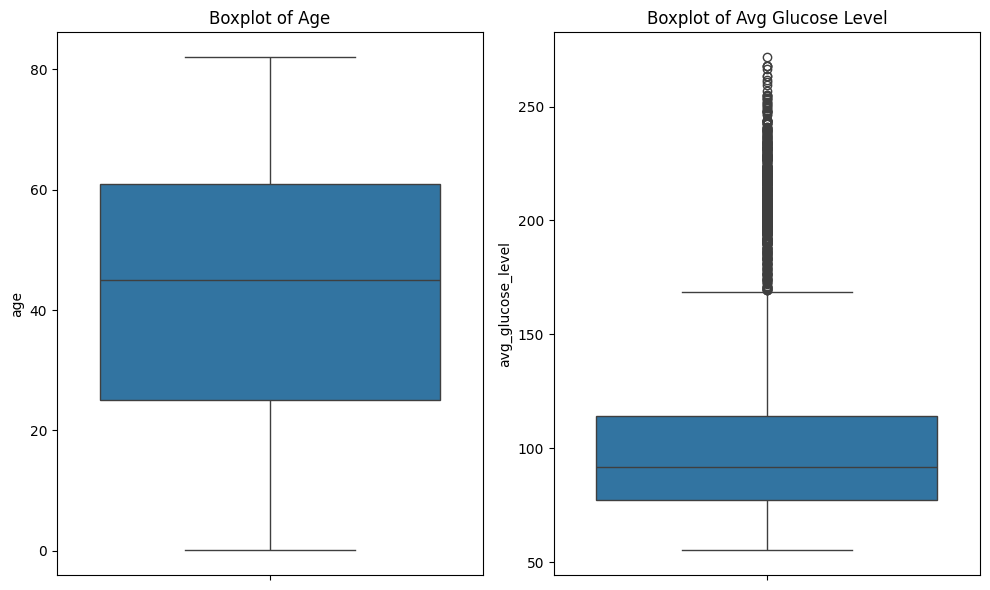

In [30]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='age', data=df)
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y='avg_glucose_level', data=df)
plt.title('Boxplot of Avg Glucose Level')

plt.tight_layout()
plt.show()


In [31]:
non_numerical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [32]:
df['gender'].value_counts()


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [33]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,formerly smoked,0


In [34]:
df = df.drop(df[df['gender'] == 'Other'].index)

In [35]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

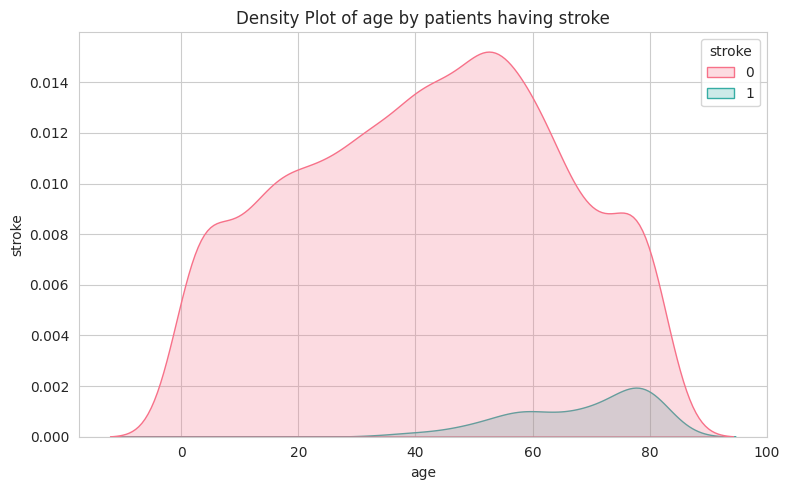

In [36]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, palette='husl')

plt.title('Density Plot of age by patients having stroke')
plt.xlabel('age')
plt.ylabel('stroke')

plt.tight_layout()
plt.show()

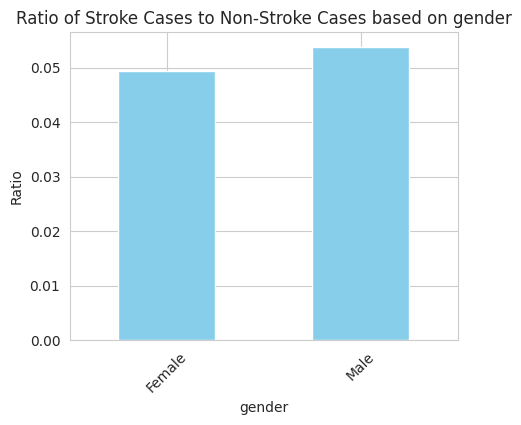

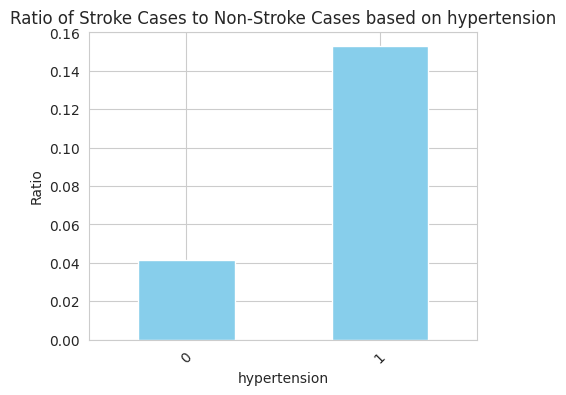

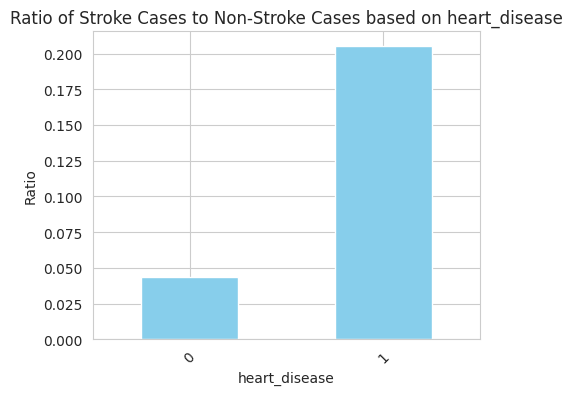

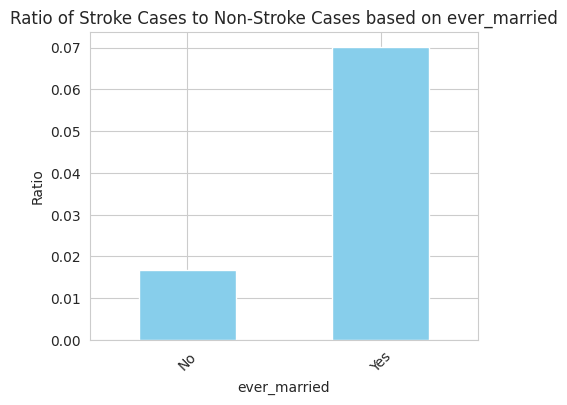

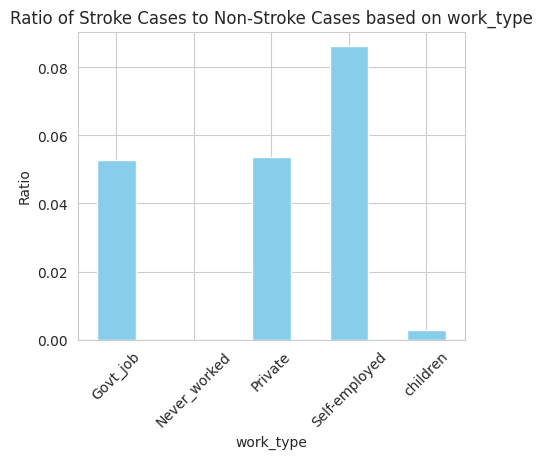

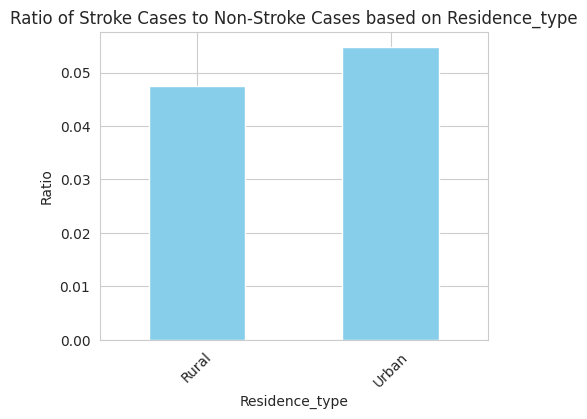

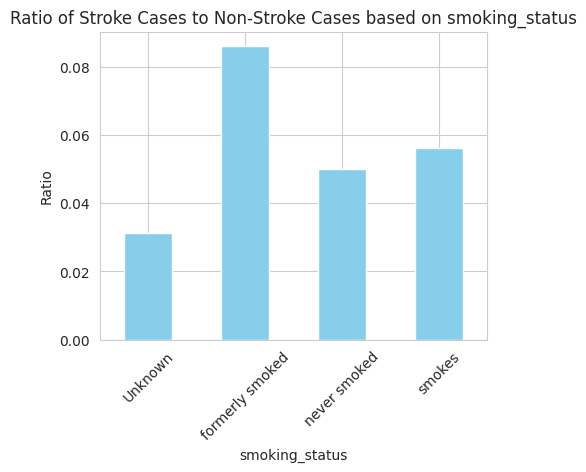

In [37]:
for col in non_numerical_cols:
    plt.figure(figsize=(5, 4))
    ratio = df.groupby([col, 'stroke']).size().unstack()
    ratio['ratio'] = ratio[1] / ratio[0]
    ratio['ratio'].plot(kind='bar', color='skyblue')
    plt.title(f'Ratio of Stroke Cases to Non-Stroke Cases based on {col}')
    plt.xlabel(col)
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.show()

In [38]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [40]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,1,1
1,0,61.0,0,0,1,3,0,202.21,2,1
2,1,80.0,0,1,1,2,0,105.92,2,1
3,0,49.0,0,0,1,2,1,171.23,3,1
4,0,79.0,1,0,1,3,0,174.12,2,1


In [41]:
selected_columns = ['age', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'avg_glucose_level', 'smoking_status']

number_of_columns = len(selected_columns)
number_of_columns

7

In [42]:
X = df[selected_columns]
y = df['stroke']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

print('After Balancing:')
print('X_train balanced shape:', X_train.shape)
print('y_train balanced shape:', y_train.shape)

After Balancing:
X_train balanced shape: (7800, 7)
y_train balanced shape: (7800,)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7800, 7)
X_test shape: (1022, 7)
y_train shape: (7800,)
y_test shape: (1022,)


In [47]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19, ResNet152
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, BatchNormalization


2024-04-05 17:57:08.550966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 17:57:11.388380: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [48]:
model = Sequential(name='Sequential_model')

model.add(Input(shape=(number_of_columns,), name='Input_Layer')) 
model.add(Dense(32, activation='relu', name='Hidden_Layer_1'))  
model.add(Dense(16, activation='relu', name='Hidden_Layer_2'))
model.add(Dense(4, activation='relu', name='Hidden_Layer_3'))
model.add(Dropout(0.2, name='dropout_layer'))
model.add(Dense(2, activation='sigmoid', name='Hidden_Layer_4'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', name='Output_Layer'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.Precision(), 'accuracy'],)

model.summary()

2024-04-05 17:57:13.123606: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 17:57:13.125282: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "Sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_4 (Dense)          │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 873 (3.41 KB)

 Trainable params: 869 (3.39 KB)

 Non-trainable params: 4 (16.00 B)

In [49]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6545 - loss: 0.6488 - precision: 0.5371 - val_accuracy: 0.0083 - val_loss: 0.8437 - val_precision: 1.0000
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7660 - loss: 0.4884 - precision: 0.7260 - val_accuracy: 0.5378 - val_loss: 0.7457 - val_precision: 1.0000
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7629 - loss: 0.4855 - precision: 0.7415 - val_accuracy: 0.7032 - val_loss: 0.5804 - val_precision: 1.0000
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.4496 - precision: 0.7802 - val_accuracy: 0.7724 - val_loss: 0.4382 - val_precision: 1.0000
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7843 - loss: 0.4510 - precision: 0.7681 - val_accuracy: 0.7513 - val_loss: 0.4770 - val_precision: 1.0000
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7996 - loss: 0.4311 - precision: 0.7855 - val_accuracy: 0.7891 - val_loss:

In [50]:
train_loss, train_acc, train_precision = model.evaluate(X_train, y_train)
test_loss, test_acc, test_precision = model.evaluate(X_test, y_test)

print('Train Loss: {:.4f}'.format(train_loss))
print('Train Accuracy: {:.4f}'.format(train_acc))
print('--------------------------------------')
print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_acc))


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8632 - loss: 0.3290 - precision: 0.4435
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3374 - precision: 0.1429   
Train Loss: 0.3551
Train Accuracy: 0.8409
--------------------------------------
Test Loss: 0.3471
Test Accuracy: 0.8640


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
loss, accuracy, precision = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8632 - loss: 0.3290 - precision: 0.4435
Train Loss: 0.3551, Train Accuracy: 0.8409


In [53]:
loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3374 - precision: 0.1429   
Test Loss: 0.3471, Test Accuracy: 0.8640


In [54]:
y_pred_probs = model.predict(X_test)


y_pred = (y_pred_probs > 0.45).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


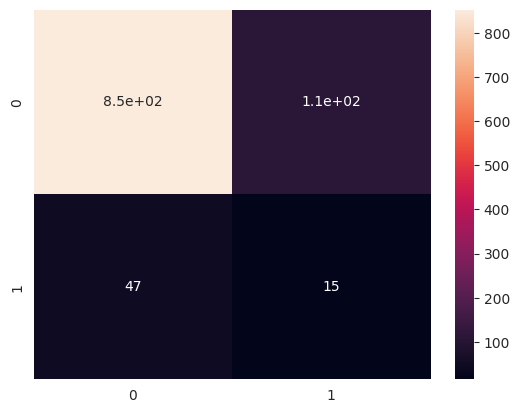

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [56]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.12      0.24      0.16        62

    accuracy                           0.85      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.90      0.85      0.87      1022



In [57]:
model.summary()

Model: "Sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_4 (Dense)          │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,613 (10.21 KB)

 Trainable params: 869 (3.39 KB)

 Non-trainable params: 4 (16.00 B)

 Optimizer params: 1,740 (6.80 KB)

In [58]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [59]:
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(9720, 7) (9720,)
(9720, 7) (9720,)
(498, 7) (498,)


In [60]:
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1458
           1       0.97      1.00      0.98      1458

    accuracy                           0.98      2916
   macro avg       0.98      0.98      0.98      2916
weighted avg       0.98      0.98      0.98      2916



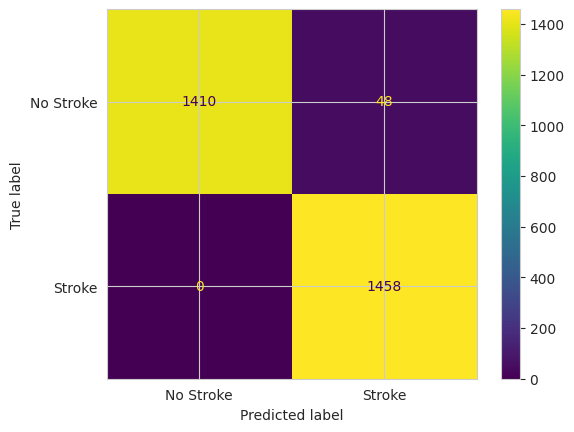

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

In [64]:
data= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


def clean_data(df):
    df = df.drop('id', axis = 1)
    
    df = df.dropna(axis = 0)
    
    df['gender'] = label_encoder.fit_transform(df['gender'])
    df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
    df['work_type'] = label_encoder.fit_transform(df['work_type'])
    df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
    df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
    
    return df
data_clean = clean_data(data)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [66]:
# model training and normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X = data_clean.iloc[:, : -1]
y = data_clean.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

# Now use RandomOverSampler from imblearn library for imbalanced class stroke
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params_grid = {
    'n_neighbors' : [3,5,7,9,11,13,15],
    'metric' : ['minkowski', 'euclidean', 'manhattan'],
    'weights' : ['distance', 'uniform']
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator =knn, param_grid = params_grid,
                          cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())

best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', weights = 'distance')
knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test)

/home/hyper/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

# For calculating scoring of model prediction
def evaluate_model(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt,yp)
    precision, recall, fbeta,_ = precision_recall_fscore_support(yt, yp, average = 'weighted')
    results_pos['precision'] = precision
    results_pos['recall'] = recall
    results_pos['f1score'] = fbeta
    
    #return results_pos
    metrics = list(results_pos.keys())
    values = list(results_pos.values())
    
    ax = sns.barplot(x=metrics, y=values, palette='BrBG')
    plt.title('Model Evaluation Metrics')
    plt.ylabel('Value')
    plt.ylim(0, 1)  # Setting y-axis limit for better visualization
    
    for i, v in enumerate(values):
        ax.text(i, v/2, f'{v:.2f}', ha='center', va='center', color='white', fontsize=12)
    
    plt.show()
    
    # Classification report for model prediction
def class_report(yt, yp):
    class_report_df = pd.DataFrame(classification_report(yt, yp, output_dict= True)).transpose()
    return class_report_df.style.background_gradient(cmap = 'BrBG',axis = 0)

# Confusion Matrix for model prediction

def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(cm, fmt='d', annot =  True, cmap = 'BrBG')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')
    plt.show()

/tmp/ipykernel_12752/2991716359.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette='BrBG')


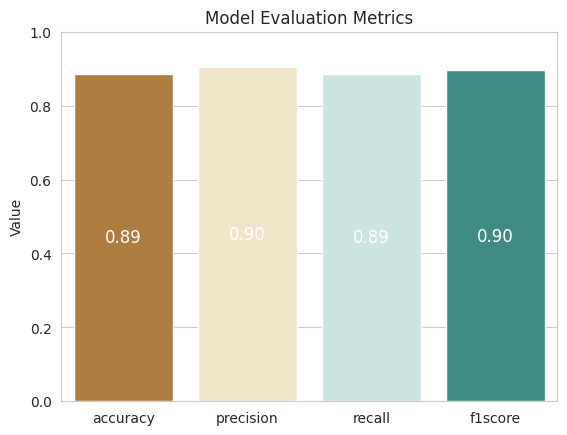

In [70]:
evaluate_model(y_test, y_pred)

In [71]:
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.950386,0.927879,0.938998,929.000000
1,0.106667,0.150943,0.125000,53.000000
accuracy,0.885947,0.885947,0.885947,0.885947
macro avg,0.528526,0.539411,0.531999,982.000000
weighted avg,0.904849,0.885947,0.895065,982.000000


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())
best_params = grid_search.best_params_
best_params

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}

/home/hyper/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/tmp/ipykernel_12752/2991716359.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette='BrBG')


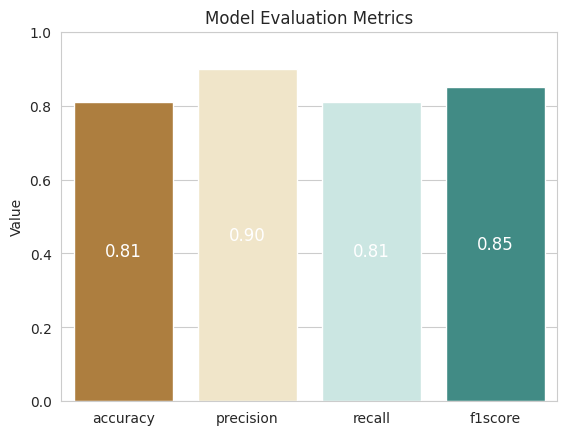

In [89]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=1, random_state=42)
dt.fit(X_train_resampled, y_train_resampled.values.ravel())

y_pred = dt.predict(X_test)

evaluate_model(y_test, y_pred)

In [90]:
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.946821,0.846074,0.893617,968.000000
1,0.050955,0.148148,0.075829,54.000000
accuracy,0.809198,0.809198,0.809198,0.809198
macro avg,0.498888,0.497111,0.484723,1022.000000
weighted avg,0.899485,0.809198,0.850407,1022.000000
